Q1:

Load the dataset and explore its structure.
Check for missing values and handle them appropriately (e.g., imputation or removal).
Describe the dataset's key statistics (mean, median, standard deviation).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/DailyDelhiClimateTrain.csv')

In [ ]:
data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [ ]:
print(data.isnull().sum())

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [ ]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


Q2:

Time Series Visualization:

Plot the time series for all variables (e.g., daily mean temperature and precipitation).
Use subplots to visualize the relationship between temperature (mean, max, min) and wind speed over time.

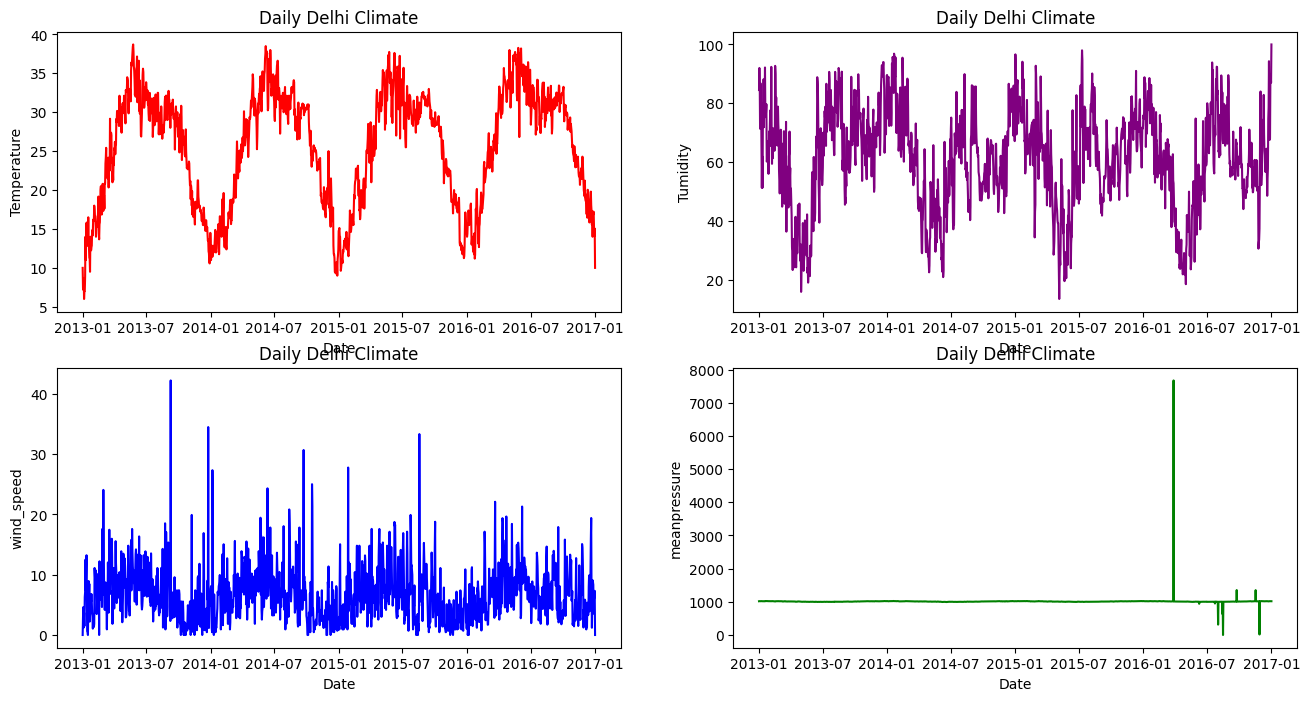

In [ ]:
data['date'] = pd.to_datetime(data['date'])
plt.figure(figsize=(16,8))
plt.subplot(2, 2, 1)
plt.plot(data.date,data.meantemp,color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Daily Delhi Climate')

plt.subplot(2, 2, 2)
plt.plot(data.date,data.humidity,color='purple')
plt.xlabel('Date')
plt.ylabel('Tumidity')
plt.title('Daily Delhi Climate')

plt.subplot(2, 2, 3)
plt.plot(data.date,data.wind_speed,color='blue')
plt.xlabel('Date')
plt.ylabel('wind_speed')
plt.title('Daily Delhi Climate')

plt.subplot(2, 2, 4)
plt.plot(data.date,data.meanpressure,color='green')
plt.xlabel('Date')
plt.ylabel('meanpressure')
plt.title('Daily Delhi Climate')

plt.show()

Q3

Seasonality and Trends:

Decompose the time series for daily mean temperature into its components (trend, seasonality, and residuals) using statistical decomposition methods.
Identify any seasonal patterns and discuss their significance.

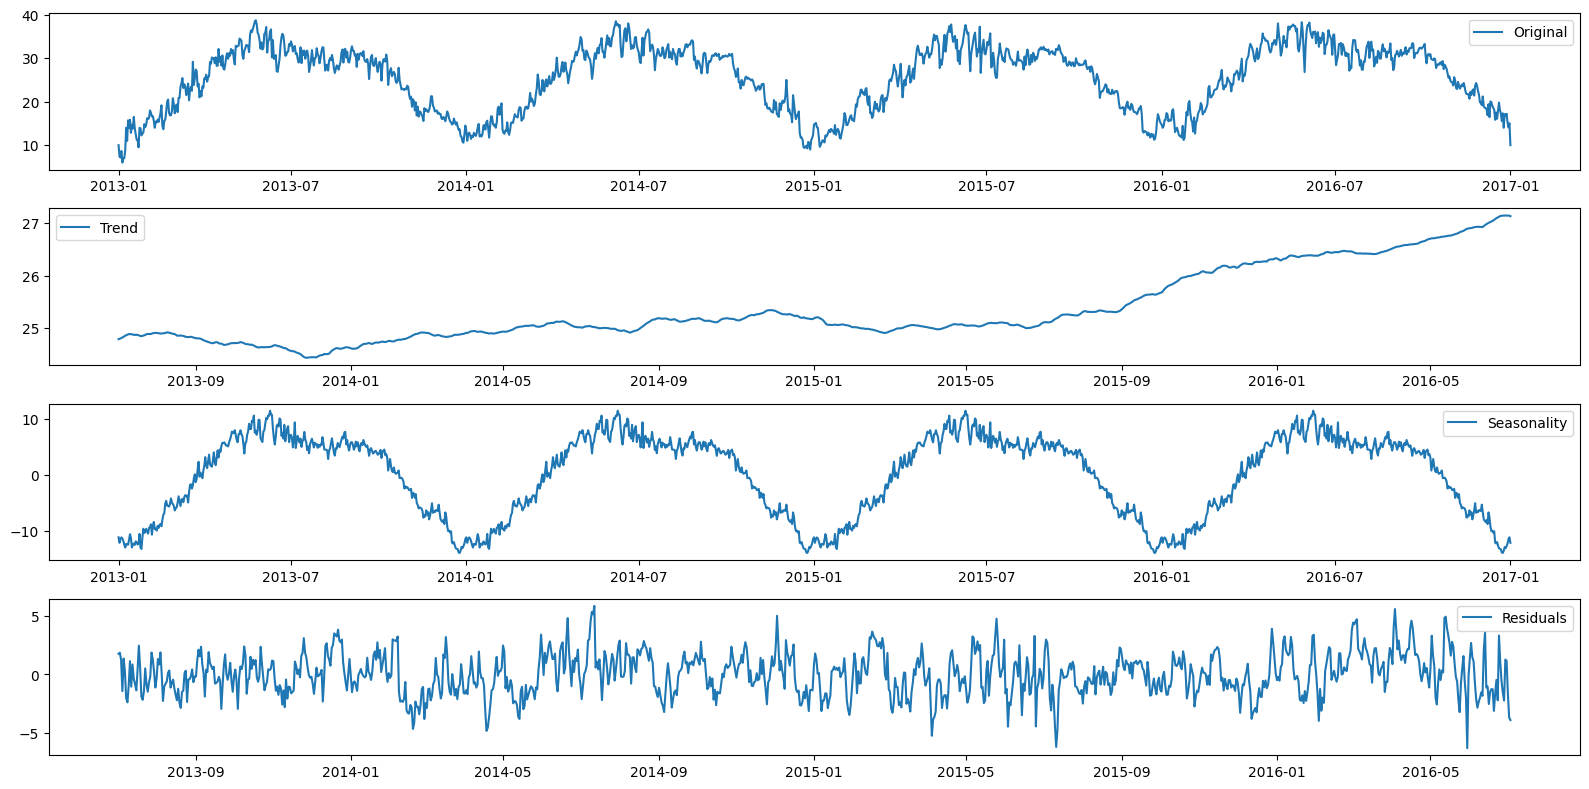

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
data = data.set_index('date')

# Decompose the 'meantemp' time series
decomposition = seasonal_decompose(data['meantemp'], model='additive', period=365) # Period is set to 365 for daily data

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(16, 8))
plt.subplot(411)
plt.plot(data['meantemp'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Q4:

Select one variable (e.g., daily mean temperature) for forecasting.
Split the dataset into training and testing sets.
Fit Seasonal Decomposition of Time Series (STL) model to the training set.
Evaluate the forecasting performance using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
train_data = data
test_data = pd.read_csv('/content/DailyDelhiClimateTest.csv')

test_data['date'] = pd.to_datetime(test_data['date'])
test_data = test_data.set_index('date')

model = ExponentialSmoothing(train_data['meantemp'], trend='add', seasonal='add', seasonal_periods=365)
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(test_data))

mae = mean_absolute_error(test_data['meantemp'], predictions)
rmse = np.sqrt(mean_squared_error(test_data['meantemp'], predictions))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Absolute Error (MAE): 2.6539749341207473
Root Mean Squared Error (RMSE): 3.3259017528934636


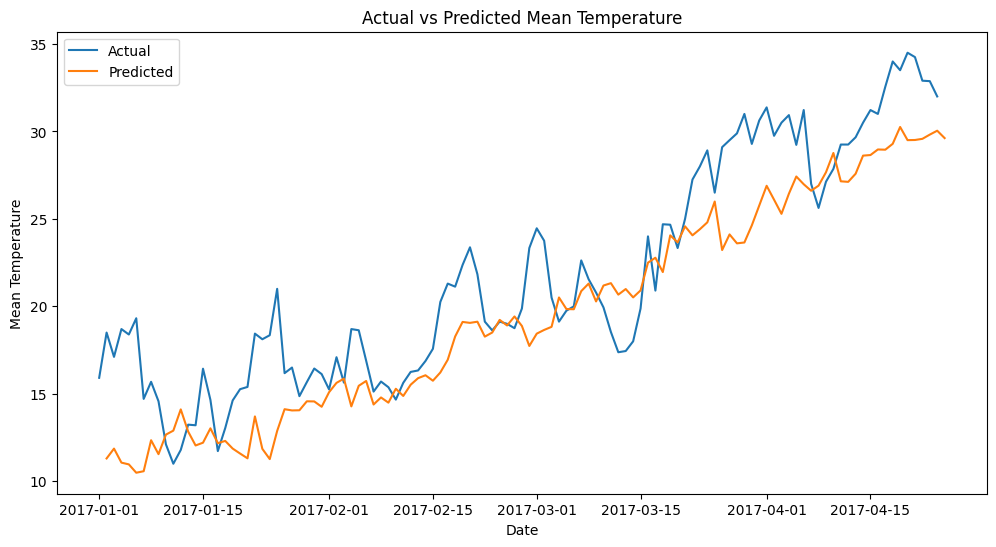

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data['meantemp'], label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Actual vs Predicted Mean Temperature')
plt.legend()
plt.show()